In [1]:
println("hello world!")

hello world!


┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1342
┌ Info: Skipping precompilation since __precompile__(false). Importing StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c].
└ @ Base loading.jl:1047


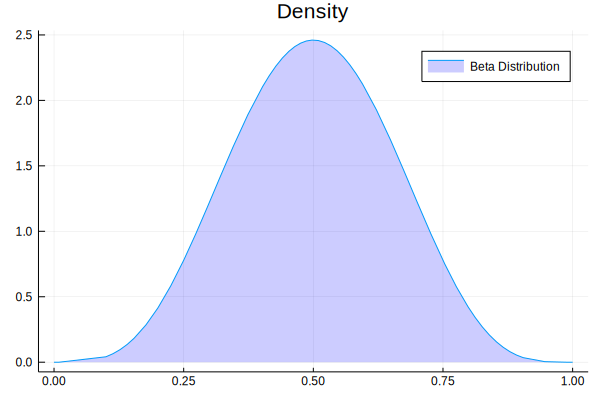

In [2]:
using Distributions
using StatPlots

plot(Beta(5,5), fillrange=0, fillalpha=0.2 , fillcolor=:blue, label="Beta Distribution", title="Density")